# Linear Regressor From Scratch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\PYTHON\LinearRegression\FuelConsumption.csv")
data.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [3]:
x_train = data[["ENGINESIZE"]][:int(data.shape[0]*0.8)].values

In [4]:
y_train = data[["CO2EMISSIONS"]][:int(data.shape[0]*0.8)].values

In [5]:
class LinearRegressor:
    def __init__(self):
        self.intercept = 0
        self.coefficient = 0
        print("Linear Regressor Initialized!")
    

    def fit(self, x, y):
        xbar = np.mean(x)
        ybar = np.mean(y)
        self.coefficient = int(np.sum(((x-xbar) * (y- ybar)))/np.sum(((x-xbar)**2)))
        self.intercept = int(ybar - (xbar * self.coefficient))
 

    def predict(self, x):
        yhat = np.array(self.intercept + (x * self.coefficient), dtype=np.int64)
        return yhat


In [6]:

# Model Evaluators
def mean_absolute_error(actual_y, yhat):
    mae = (1/len(yhat)) * np.sum(np.abs(actual_y - yhat))
    return mae


def root_mean_squared_error(actual_y, yhat):
    mae = (1/len(yhat)) * np.sum(np.square(np.abs(actual_y - yhat)))
    return np.sqrt(mae)


def r2_score(actual_y, yhat):
    r2 = 1 - (np.sum(np.square(actual_y - yhat)) /
              np.sum(np.square(actual_y - np.mean(actual_y))))
    return r2

Linear Regressor Initialized!
>>>>>>>
 MAE:  21.370892018779344
MSE:  29.611728421250536
(Higher R2 Value Means Better Fit) R2:  0.7410755368811908


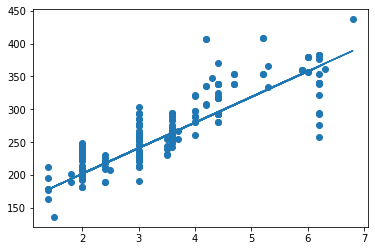

Linear Regressor Initialized!
>>>>>>>
 MAE:  25.291079812206572
MSE:  32.64857695926101
(Higher R2 Value Means Better Fit) R2:  0.7854639843790612


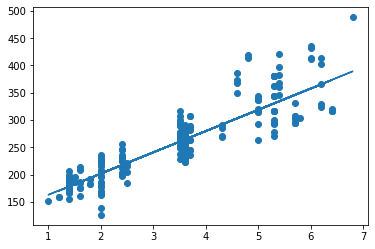

Linear Regressor Initialized!
>>>>>>>
 MAE:  24.788732394366196
MSE:  32.75273704650588
(Higher R2 Value Means Better Fit) R2:  0.7255924942917873


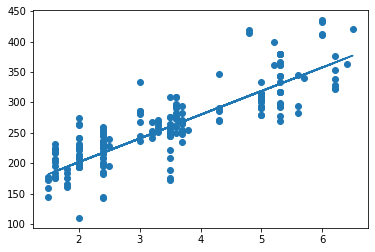

Linear Regressor Initialized!
>>>>>>>
 MAE:  24.600938967136152
MSE:  31.668025668886564
(Higher R2 Value Means Better Fit) R2:  0.7390783873637474


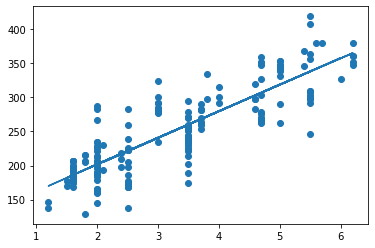

Linear Regressor Initialized!
>>>>>>>
 MAE:  20.23943661971831
MSE:  26.86997032310083
(Higher R2 Value Means Better Fit) R2:  0.7933662464097011


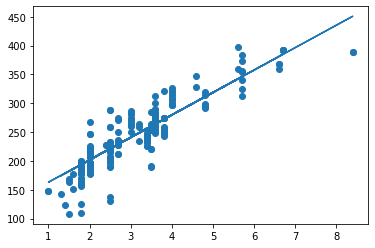

>>>>>>>>>>>>>>>
 Average MAE 23.258215962441312 
 Averagr MSE 30.710207683800963 
 Average R2 0.7569153298650976 


In [7]:
# K-Fold Cross Validation
MAe = [] 
MSe = []
R2 =[]
step = int(data.shape[0] * 0.2)
low, up = 0,step
for Fold in range(5):
    if low == 0:
        nx_train = data[["ENGINESIZE"]][up:].values
        ny_train = data[["CO2EMISSIONS"]][up:].values
    elif up == data.shape[0]:
        nx_train = data[["ENGINESIZE"]][:low].values
        ny_train = data[["CO2EMISSIONS"]][:low].values
    else:
        train_indexe1 = list(range(0,low))
        train_indexe2 = list(range(up,data.shape[0]-1))
        train_indexes = train_indexe1+train_indexe2

    nx_test = data[["ENGINESIZE"]].iloc[list(range(low,up))].values
    ny_test = data[["CO2EMISSIONS"]].iloc[list(range(low,up))].values

    model = LinearRegressor()
    model.fit(nx_train, ny_train)
    ny_pred = model.predict(nx_test)

    mae = mean_absolute_error(ny_test, ny_pred)
    mse = root_mean_squared_error(ny_test, ny_pred)
    r2 = r2_score(ny_test, ny_pred)
    MAe.append(mae); MSe.append(mse); R2.append(r2)
    print(">>>>>>>\n MAE: ", mae)
    print("MSE: ",mse )
    print("(Higher R2 Value Means Better Fit) R2: ", r2)
    low , up = up, up+step

    # Plotting Model
    plt.scatter(nx_test, ny_test)
    plt.plot(nx_test, ny_pred)
    plt.show()


print(f">>>>>>>>>>>>>>>\n Average MAE {sum(MAe)/len(MAe)} \n Averagr MSE {sum(MSe)/len(MSe)} \n Average R2 {sum(R2)/len(R2)} ")
